In [1]:
import pandas as pd
import numpy as np

In [2]:
# visualise library

import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns

In [3]:
# stats libraries
import statsmodels.formula.api as sm
from scipy.stats.stats import pearsonr

In [5]:
cycle_five = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/Cycle_5_players.csv")
cycle_fifty = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/Cycle_50_players.csv")

In [6]:
lattice_five = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/Lattice_5_players.csv")
lattice_fifty = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/Lattice_50_players.csv")

In [7]:
rr_five = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/Round_Robin_5.csv")
rr_fifty = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/Round_Robin_50.csv")

In [85]:
# this is for the round robin ones
x = list(range(50))  
ranks = [0,1,2,3,4]*100
rr_five['ranking']=ranks
rr_five['player_name'] = rr_five['winners']

In [87]:
data = rr_five
title = "Round Robin"
size = '5'

In [88]:
# Get winning ratio
# First we get particapting number
data['frequency'] = data.groupby(['player_name'])['seed'].transform('count')

In [89]:
#crosstab of players and rank 
players_ranking = pd.crosstab(data.player_name, data.ranking) # players and their ranks

In [90]:
# Secondly wins
temp = players_ranking[0]
wins = players_ranking[0][temp]
wining = pd.DataFrame({'player_name' : list(players_ranking.index), 
                               'wins' : players_ranking[0].values})

In [91]:
data = pd.merge(data, wining)
data['ratio'] = data.wins/data.frequency

In [92]:
#data.to_csv("/home/nikoleta/src/jobs/Analysis/ratio_rr_fifty.csv")

In [93]:
nplayers = len(data['player_name'].unique())
width = max(nplayers / 3, 12)
height = width / 2
spacing = 4
positions = spacing * np.arange(1, nplayers + 1, 1)

In [94]:
data = data.sort('ratio')
names = data.player_name.unique()

/home/nikoleta/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [17]:
# barplot
figure = plt.figure(figsize=(width, height))
plt.xticks(positions, names, rotation=90)
plt.xlim(0, spacing * (nplayers + 1))
plt.tick_params(axis='both', which='both', labelsize=8)
sns.barplot(data= data, x = 'player_name', y='ratio', palette="Blues_d")
plt.title('Winning Ratio Lattice s=5', fontsize= 70)
#plt.savefig("/home/nikoleta/Desktop/Images/winners-{}.pdf".format(name), format='pdf')
plt.show()

In [19]:
figure = plt.figure(figsize=(width, height))
plot = sns.regplot(x='frequency', y='ratio', data=data, scatter_kws={'s':500})
plt.xlabel('Number that a strategy has participated in a tournament', fontsize =  70)
plt.ylabel('Winning ratio', fontsize = 70)
plt.title('Winning ratio against number of participations Round Robin s=50', fontsize = 70)
plt.show()
#plt.savefig("/home/nikoleta/Desktop/Images/wining-ratio-{}.pdf".format(name), format='pdf')

In [95]:
# normilizes score
data['normalised_score'] = data.average_score/data.frequency

In [96]:
grouped = data.groupby(["player_name"])
temp = pd.DataFrame({col:vals['normalised_score'] for col,vals in grouped})
meds = temp.median()
meds.sort(ascending=False)
temp = temp[meds.index]

/home/nikoleta/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


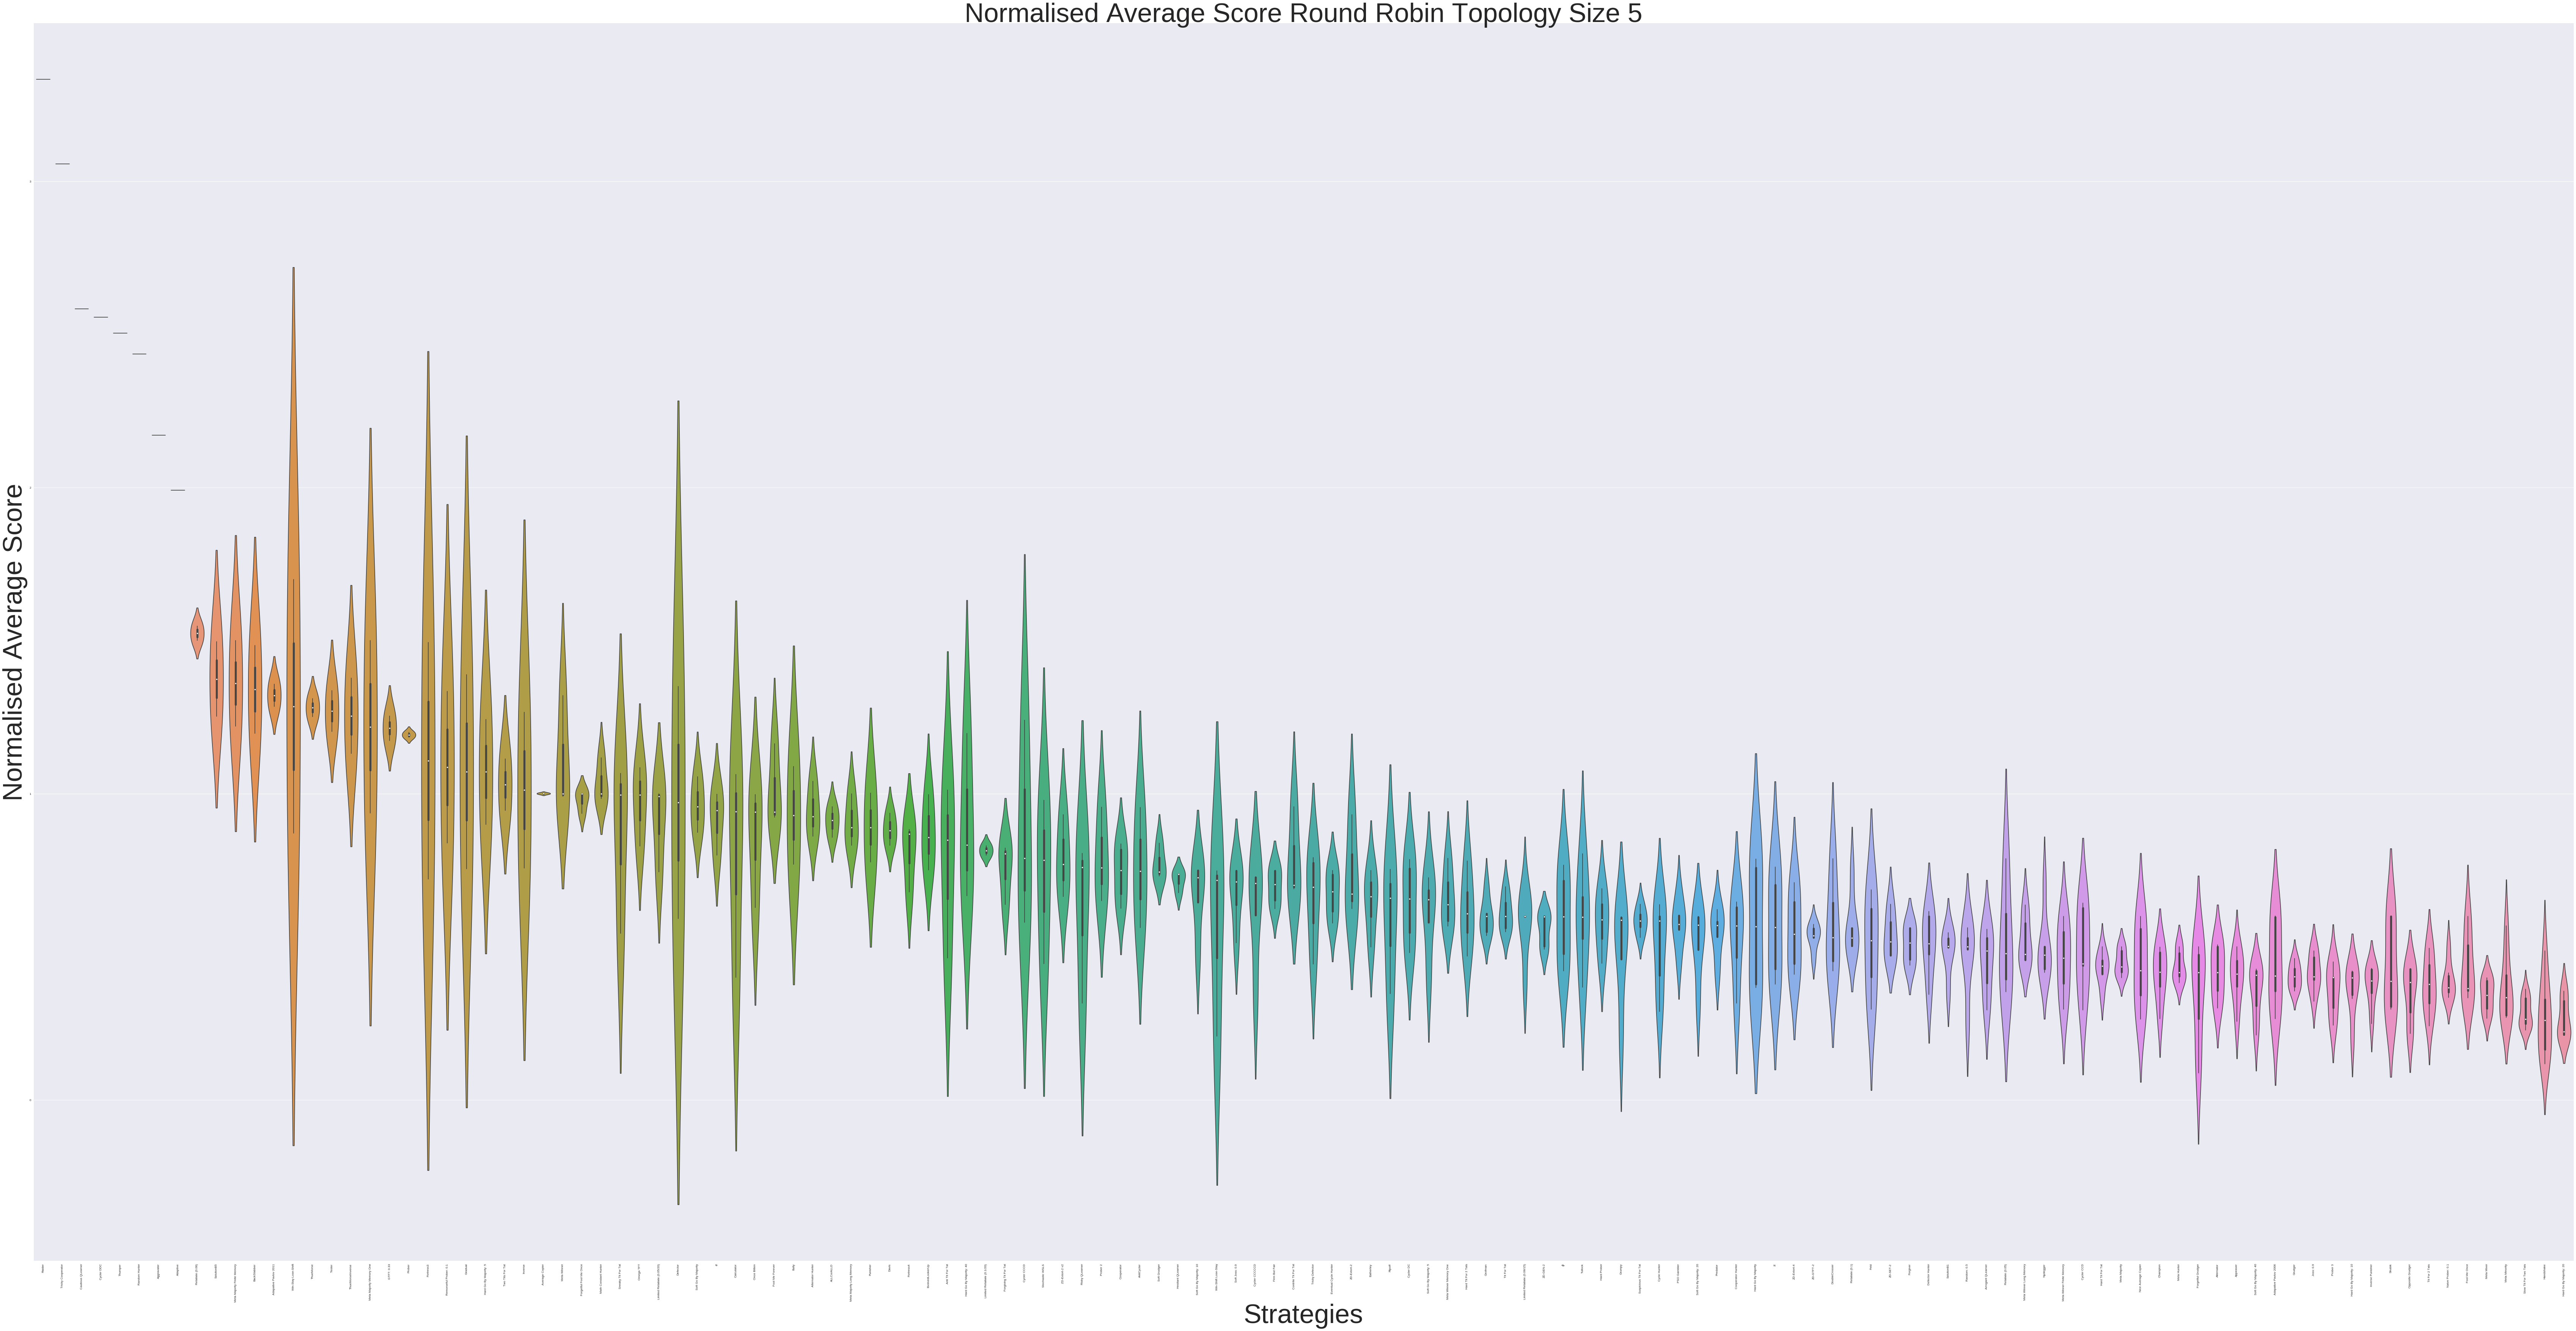

In [97]:
figure = plt.figure(figsize=(120, 60))
plt.xticks(positions, rotation=90)
plt.xlim(0, spacing * (nplayers + 1))
plt.tick_params(axis='both', which='both', labelsize=8)
sns.violinplot(data=temp, width= 0.7, scale = 'width')
plt.xlabel('Strategies', fontsize=70)
plt.ylabel('Normalised Average Score', fontsize=70)
plt.title('Normalised Average Score {} Topology Size {}'.format(title,size), fontsize=70)
plt.savefig("/home/nikoleta/src/jobs/images/normalised-score-{}-{}.pdf".format(title,size), format='pdf',bbox_inches='tight')

In [ ]:
grouped = data.groupby(["frequency"])
temp = pd.DataFrame({col:vals['normalised_score'] for col,vals in grouped})
meds = temp.median()
meds.sort(ascending=False)
temp = temp[meds.index]

In [ ]:
figure = plt.figure(figsize=(width, height))
plt.xticks(positions, rotation=90)
plt.xlim(0, spacing * (nplayers + 1))
plt.tick_params(axis='both', which='both', labelsize=8)
temp.boxplot(rot=90, widths = 0.9)
plt.xlabel('Participations', fontsize=70)
plt.ylabel('Normalised Average Score', fontsize=70)
plt.title('Box plot for normalised average score Lattice s=50', fontsize=70)
plt.savefig("/home/nikoleta/Desktop/Images/av-score-part-{}.pdf".format(name), format='pdf')

In [16]:
# regression

rg= sm.ols(formula="normalised_score ~ degree + average_neighboorhood_score + clustering + frequency " , data=data).fit()


In [17]:
rg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalised_score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2101.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):               0.00
Time:                        01:58:41   Log-Likelihood:                 10627.
No. Observations:                5000   AIC:                        -2.125e+04
Df Residuals:                    4997   BIC:                        -2.123e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       0.0280      0.000     64.942      0.000         0.027     0.029
degree                          0.0559      0.001     64.942      0.000         0.054     0.058
average_neighboorhood_score -3.763e-06   1.86e-06     -2.024      0.043     -7.41e-06 -1.18e-07
clustering                           0          0        nan        nan             0         0
frequency                      -0.0016   2.46e-05    -64.727      0.000        -0.002    -0.002
==============================================================================
Omnibus:                     3175.677   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86489.849
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      22.708   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
for i in range(len(data)):
    temp = data.player_name[i] == ratio.player_name
    x.append(ratio.ratio[temp])

In [68]:
data.merge(ratio, on='player_name')
data.head(1)

,players_list,seed,parameter,player_name,player_index,degree,neighbors,neighborhood_size,ranking,scores,...,R,P,S,T,clustering,connectivity,cliques,frequency,normalised_score,ratio
0,"[Arrogant QLearner, Tit For 2 Tats, Meta Winne...",0,0,SolutionB1,0,2,"(Arrogant QLearner, Joss: 0.9)",2,1,"[1126, 1117, 1110, 1108, 1120, 1092, 1105, 110...",...,3,1,0,5,0.0,2,"[[0, 1], [0, 4]]",50,0.05555,"110 0.26 Name: ratio, dtype: float64"


In [49]:
data.merge(ratio, on='player_name')
data.head()

,players_list,seed,parameter,player_name,player_index,degree,neighbors,neighborhood_size,ranking,scores,...,R,P,S,T,clustering,connectivity,cliques,frequency,normalised_score,ratio
0,"[Arrogant QLearner, Tit For 2 Tats, Meta Winne...",0,0,SolutionB1,0,2,"(Arrogant QLearner, Joss: 0.9)",2,1,"[1126, 1117, 1110, 1108, 1120, 1092, 1105, 110...",...,3,1,0,5,0.0,2,"[[0, 1], [0, 4]]",50,0.055550,"110 0.26 Name: ratio, dtype: float64"
1,"[Arrogant QLearner, Tit For 2 Tats, Meta Winne...",0,0,Arrogant QLearner,1,2,"(SolutionB1, Tit For 2 Tats)",2,2,"[1238, 1234, 1233, 1230, 1241, 1229, 1242, 122...",...,3,1,0,5,0.0,2,"[[0, 1], [2, 1]]",50,0.061575,"13 0.12 Name: ratio, dtype: float64"
2,"[Arrogant QLearner, Tit For 2 Tats, Meta Winne...",0,0,Tit For 2 Tats,2,2,"(Arrogant QLearner, Meta Winner Long Memory)",2,0,"[1164, 1173, 1162, 1161, 1178, 1170, 1168, 117...",...,3,1,0,5,0.0,2,"[[2, 1], [2, 3]]",70,0.041839,"118 0.357143 Name: ratio, dtype: float64"
3,"[Arrogant QLearner, Tit For 2 Tats, Meta Winne...",0,0,Meta Winner Long Memory,3,2,"(Tit For 2 Tats, Joss: 0.9)",2,4,"[806, 813, 815, 831, 817, 855, 837, 815, 823, ...",...,3,1,0,5,0.0,2,"[[2, 3], [3, 4]]",50,0.040800,"77 0.22 Name: ratio, dtype: float64"
4,"[Arrogant QLearner, Tit For 2 Tats, Meta Winne...",0,0,Joss: 0.9,4,2,"(SolutionB1, Meta Winner Long Memory)",2,3,"[838, 844, 854, 880, 834, 908, 868, 860, 860, ...",...,3,1,0,5,0.0,2,"[[0, 4], [3, 4]]",60,0.035708,"63 0.133333 Name: ratio, dtype: float64"


In [34]:
temp = data.player_name[1] == ratio.player_name
yolo =  ratio.ratio[temp]
yolo

13    0.12
Name: ratio, dtype: float64

In [ ]:
edges = []


In [ ]:
# example with cycle five
# lets create a circular graph with the interzactions
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G=nx.DiGraph()
G.add_nodes_from(cycle_fifty['player_name'].unique())

plt.figure(figsize=(18,18))
nx.draw_circular(G,node_color='g', edge_color='#909090', node_size=500)
plt.axis('equal')

In [ ]:
import networkx as nx

In [ ]:
G=nx.read_gml('/home/nikoleta/Desktop/Cycle_five.gml')

In [ ]:
nx.draw(G)